1. Package Installation

In [59]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Data Import and Libraries

In [61]:
# Importing required libraries
import pandas as pd  # Import pandas for data manipulation and DataFrame operations
import matplotlib.pyplot as plt  # Import matplotlib for creating basic visualizations
import seaborn as sns  # Import seaborn for enhanced statistical visualizations

sns.set(style="whitegrid")  # Set seaborn style with white background and grey grid

3. Sample Data Creation

In [62]:
# Creating a dictionary containing order data
data = {
    'Order ID': ['CA-2016-152156', 'CA-2016-152156', 'CA-2016-138688', 'US-2015-108966', 'US-2015-108966'],  # Unique identifier for each order
    'Order Date': ['11/8/16', '11/8/16', '6/12/16', '10/11/15', '10/11/15'],  # Date of order (mm/dd/yy format)
    'Customer ID': ['CG-12520', 'CG-12520', 'DV-13045', 'SO-20335', 'SO-20335'],  # Customer identifier
    'Product Name': ['Bookcase', 'Chair', 'Phone', 'Labels', 'Tables'],  # Name of ordered products
    'Category': ['Furniture', 'Furniture', 'Technology', 'Office Supplies', 'Furniture'],  # Product categories
    'Sales': [261.96, 731.94, 911.424, 14.62, 957.5775],  # Sales amount in dollars
    'Quantity': [2, 3, 5, 2, 5],  # Number of items purchased
    'Discount': [0.0, 0.1, 0.2, 0.0, 0.45],  # Discount applied (in decimal)
    'Profit': [41.9136, 219.582, 183.6864, 6.8714, -383.031]  # Profit from transactions
}

# Converting dictionary to DataFrame
df = pd.DataFrame(data)  # Create DataFrame structure for data analysis

4. Data Processing

In [63]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate Revenue (Sales after discount)
df['Revenue'] = df['Sales'] * (1 - df['Discount'])

# Create Month-Year column for time series analysis
df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

C:\Users\dzaki\AppData\Local\Temp\ipykernel_20652\229231269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


5. Sales Trend Analysis

C:\Users\dzaki\AppData\Local\Temp\ipykernel_20652\3993197975.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()  # Adjust layout
C:\Users\dzaki\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


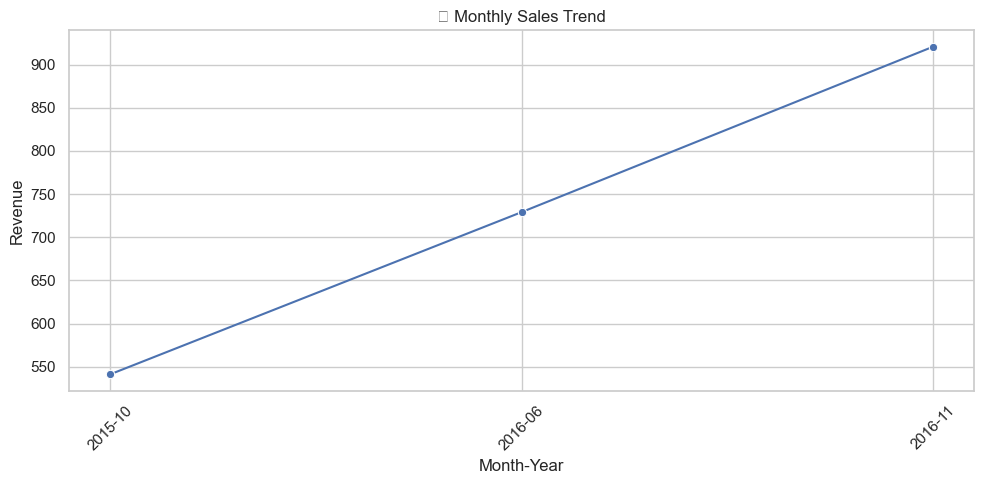

In [64]:
# Group sales data by month
monthly_sales = df.groupby('Month-Year')['Revenue'].sum().reset_index()

# Visualize monthly sales trend
plt.figure(figsize=(10, 5))  # Set figure size
sns.lineplot(data=monthly_sales, x='Month-Year', y='Revenue', marker='o')  # Create line plot with markers
plt.title('📈 Monthly Sales Trend')  # Set graph title
plt.xlabel('Month-Year')  # X-axis label
plt.ylabel('Revenue')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

6. Top Products Analysis

C:\Users\dzaki\AppData\Local\Temp\ipykernel_20652\2578616623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')  # Create horizontal bar plot
C:\Users\dzaki\AppData\Local\Temp\ipykernel_20652\2578616623.py:10: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dzaki\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


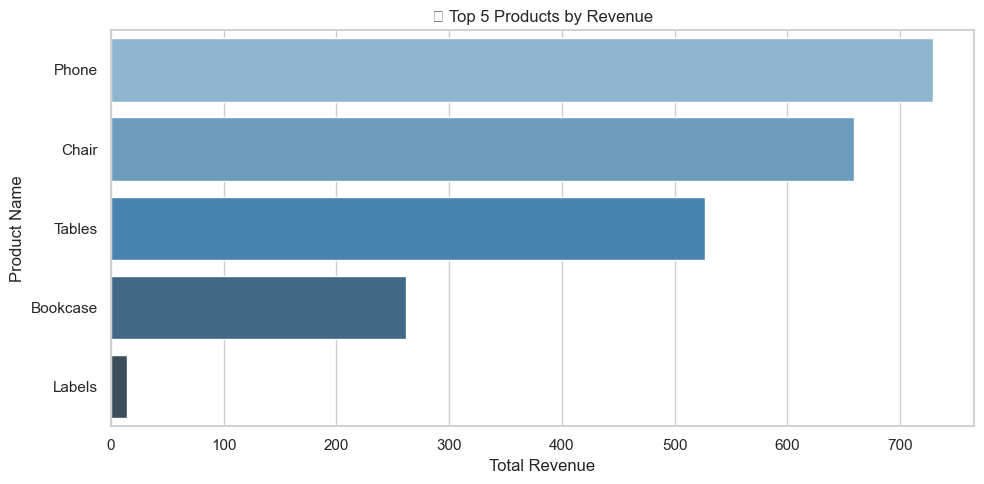

In [65]:
# Get top 5 products by revenue
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(5)

# Visualize top 5 products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_d')  # Create horizontal bar plot
plt.title('🏆 Top 5 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [68]:
# Rangkuman per produk
df.groupby('Product Name')[['Quantity', 'Sales', 'Discount', 'Revenue', 'Profit']].sum().sort_values(by='Revenue', ascending=False)


,Quantity,Sales,Discount,Revenue,Profit
Product Name,,,,,
Phone,5,911.4240,0.20,729.139200,183.6864
Chair,3,731.9400,0.10,658.746000,219.5820
Tables,5,957.5775,0.45,526.667625,-383.0310
Bookcase,2,261.9600,0.00,261.960000,41.9136
Labels,2,14.6200,0.00,14.620000,6.8714


7. Category Analysis

C:\Users\dzaki\AppData\Local\Temp\ipykernel_20652\2715495091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='Greens_d')
C:\Users\dzaki\AppData\Local\Temp\ipykernel_20652\2715495091.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dzaki\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


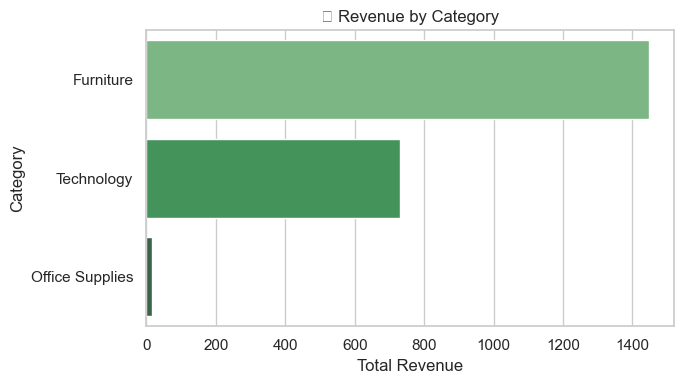

In [66]:
# Calculate revenue by category
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Visualize revenue by category
plt.figure(figsize=(7, 4))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='Greens_d')
plt.title('📊 Revenue by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 📊 Kesimpulan Analisis Penjualan Toko Online

## ✅ Ringkasan Temuan

1. ### 📈 Tren Penjualan Menunjukkan Peningkatan
   - Penjualan tertinggi terjadi pada **November 2016**, dengan total pendapatan paling besar dari semua bulan yang dianalisis.
   - Terdapat **peningkatan signifikan** dari bulan sebelumnya, mengindikasikan pertumbuhan bisnis atau adanya promosi khusus.

2. ### 🛒 Produk Teknologi Mendominasi Pendapatan
   - Produk **Phone** menyumbang pendapatan tertinggi (**Rp 729.139**), diikuti oleh **Chair** dan **Tables**.
   - Produk kategori **Furniture** seperti **Chair** cukup berkontribusi, namun **Bookcase** menghasilkan pendapatan yang lebih kecil.

3. ### 📉 Terdapat Produk yang Tidak Menguntungkan
   - Produk **Tables**, meskipun berpendapatan besar, mengalami **kerugian** akibat diskon tinggi (45%).
   - Ini menunjukkan bahwa diskon besar dapat merusak profitabilitas jika tidak dikendalikan dengan tepat.

4. ### 🎯 Fokus dan Optimalisasi
   - Produk dengan **pendapatan dan profit tinggi** seperti *Phone* dan *Chair* dapat dijadikan prioritas dalam promosi dan stok.
   - Produk seperti **Labels**, yang menghasilkan revenue sangat kecil, perlu dikaji kelayakannya untuk dipertahankan.

---

## 📌 Rekomendasi Bisnis

- Tingkatkan promosi pada produk yang **tinggi revenue dan menguntungkan**.
- Evaluasi dan optimalkan strategi **diskon** agar tidak merugikan.
- Lakukan analisis lanjutan pada produk yang **kurang laku atau tidak menguntungkan** untuk efisiensi bisnis.

